In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt
import json

In [2]:
#import and read json file
recipies = pd.read_json('recipies.json')
recipies.head()

,id,cuisine,ingredients
0,10259,greek,"[romaine lettuce, black olives, grape tomatoes..."
1,25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, g..."
2,20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,22213,indian,"[water, vegetable oil, wheat, salt]"
4,13162,indian,"[black pepper, shallots, cornflour, cayenne pe..."


In [4]:
len(recipies)

39774

In [5]:
# Check for any missing data
print("Table size -", end=' ')
print(recipies.shape)

print("Checking for missing values..")
# Number of missing values in each column of training data
missing_val_count_by_column = (recipies.isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column > 0])

# Get names of columns with missing values
missing_cols = [col for col in recipies.columns
                     if recipies[col].isnull().any()]

Table size - (39774, 3)
Checking for missing values..
Series([], dtype: int64)


In [17]:
#great, no missing values. what can I do with ingredients? list?
type(recipies.loc[0,'ingredients'])

list

In [18]:
#define a column for number of ingredients in the dish
recipies['num_ingredients'] = recipies.apply(lambda x: len(x['ingredients']), axis=1)
recipies.head()

,id,cuisine,ingredients,num_ingredients
0,10259,greek,"[romaine lettuce, black olives, grape tomatoes...",9
1,25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, g...",11
2,20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g...",12
3,22213,indian,"[water, vegetable oil, wheat, salt]",4
4,13162,indian,"[black pepper, shallots, cornflour, cayenne pe...",20


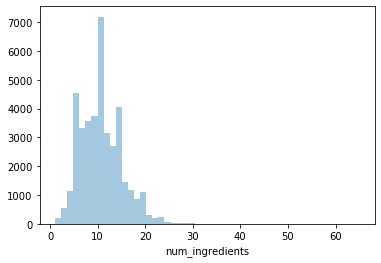

In [19]:
sns.distplot(recipies['num_ingredients'], kde=False)

In [20]:
recipies['num_ingredients'].max()

65

In [21]:
#at least 1 outlier recipie with 65 ingredients, actually 40 such recipies
len(recipies[recipies['num_ingredients']>30])

40

In [25]:
# a lot of the recipies with high number of ingredients are mexican and indian
recipies.loc[recipies['num_ingredients']>30, 'cuisine'].value_counts()

mexican         12
indian           5
thai             3
italian          3
jamaican         2
southern_us      2
cajun_creole     2
brazilian        2
moroccan         2
chinese          2
french           1
spanish          1
japanese         1
vietnamese       1
filipino         1
Name: cuisine, dtype: int64

In [26]:
# 20 different cuisines here, nothing grossly underrepresented
recipies['cuisine'].value_counts()

italian         7838
mexican         6438
southern_us     4320
indian          3003
chinese         2673
french          2646
cajun_creole    1546
thai            1539
japanese        1423
greek           1175
spanish          989
korean           830
vietnamese       825
moroccan         821
british          804
filipino         755
irish            667
jamaican         526
russian          489
brazilian        467
Name: cuisine, dtype: int64

In [28]:
recipies['ingredients'][0]

['romaine lettuce',
 'black olives',
 'grape tomatoes',
 'garlic',
 'pepper',
 'purple onion',
 'seasoning',
 'garbanzo beans',
 'feta cheese crumbles']

In [29]:
# get a master list of all ingredients
all_ingredients = []
for i in range(len(recipies)):
    all_ingredients += recipies.loc[i,'ingredients']

In [33]:
#428275 total ingredients
len(all_ingredients)

428275

In [63]:
# get unique ingredients and frequency of each
from collections import Counter
freq_ingredients = Counter(all_ingredients)
freq_ingredients=dict(freq_ingredients)

In [64]:
freq_ingredients = pd.DataFrame.from_dict(freq_ingredients.items())
freq_ingredients.columns = ['ingredient','frequency']

In [67]:
# salt most frequent! surprise!
freq_ingredients.sort_values(by=['frequency'], ascending=False)

,ingredient,frequency
11,salt,18049
54,olive oil,7972
35,onions,7972
29,water,7457
3,garlic,7380
...,...,...
5035,sauerkraut juice,1
5034,no-calorie sweetener,1
5033,Bob Evans Italian Sausage,1
5022,extra firm silken tofu,1


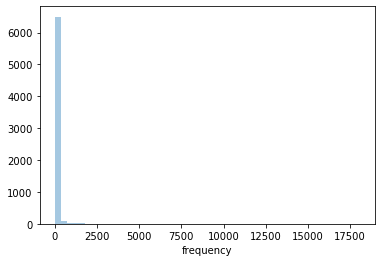

In [68]:
# very bottom heavy distribution
sns.distplot(freq_ingredients['frequency'], kde=False)

In [78]:
freq_ingredients

,ingredient,frequency
0,romaine lettuce,270
1,black olives,229
2,grape tomatoes,228
3,garlic,7380
4,pepper,4438
...,...,...
6709,LiptonÂ® Iced Tea Brew Family Size Tea Bags,1
6710,Hidden ValleyÂ® Greek Yogurt Original RanchÂ® ...,1
6711,lop chong,1
6712,tomato garlic pasta sauce,1


In [88]:
recipies.head()

,id,cuisine,ingredients,num_ingredients
0,10259,greek,"[romaine lettuce, black olives, grape tomatoes...",9
1,25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, g...",11
2,20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g...",12
3,22213,indian,"[water, vegetable oil, wheat, salt]",4
4,13162,indian,"[black pepper, shallots, cornflour, cayenne pe...",20


In [81]:
freq_ingredients.loc[0,'ingredient']

'romaine lettuce'

In [89]:
# for naive model just put in all of these ingredients, but interesting room to experiment
for i in range(len(freq_ingredients)):
    current_ingredient = freq_ingredients.loc[i,'ingredient']
    print('Filling in ingredient {}-{}'.format(i,current_ingredient))
    s = 'ingredient_{}'.format(i)
    recipies[s] = recipies.apply(lambda x: (current_ingredient in x['ingredients']), axis=1)
recipies.head()

Filling in ingredient 0-romaine lettuce
Filling in ingredient 1-black olives
Filling in ingredient 2-grape tomatoes
Filling in ingredient 3-garlic
Filling in ingredient 4-pepper
Filling in ingredient 5-purple onion
Filling in ingredient 6-seasoning
Filling in ingredient 7-garbanzo beans
Filling in ingredient 8-feta cheese crumbles
Filling in ingredient 9-plain flour
Filling in ingredient 10-ground pepper
Filling in ingredient 11-salt
Filling in ingredient 12-tomatoes
Filling in ingredient 13-ground black pepper
Filling in ingredient 14-thyme
Filling in ingredient 15-eggs
Filling in ingredient 16-green tomatoes
Filling in ingredient 17-yellow corn meal
Filling in ingredient 18-milk
Filling in ingredient 19-vegetable oil
Filling in ingredient 20-mayonaise
Filling in ingredient 21-cooking oil
Filling in ingredient 22-green chilies
Filling in ingredient 23-grilled chicken breasts
Filling in ingredient 24-garlic powder
Filling in ingredient 25-yellow onion
Filling in ingredient 26-soy sauce

Filling in ingredient 210-andouille sausage
Filling in ingredient 211-cajun seasoning
Filling in ingredient 212-peanut oil
Filling in ingredient 213-celery
Filling in ingredient 214-ground red pepper
Filling in ingredient 215-shrimp
Filling in ingredient 216-onion powder
Filling in ingredient 217-firm tofu
Filling in ingredient 218-turnips
Filling in ingredient 219-palm sugar
Filling in ingredient 220-sliced chicken
Filling in ingredient 221-fish sauce
Filling in ingredient 222-lime wedges
Filling in ingredient 223-green papaya
Filling in ingredient 224-chile powder
Filling in ingredient 225-tamarind paste
Filling in ingredient 226-chinese chives
Filling in ingredient 227-crushed garlic
Filling in ingredient 228-green onions
Filling in ingredient 229-white sugar
Filling in ingredient 230-dried basil
Filling in ingredient 231-diced tomatoes
Filling in ingredient 232-Johnsonville Andouille Dinner Sausage
Filling in ingredient 233-parsley
Filling in ingredient 234-jambalaya rice mix
Filli

Filling in ingredient 416-softened butter
Filling in ingredient 417-food colouring
Filling in ingredient 418-Madeira
Filling in ingredient 419-foie gras
Filling in ingredient 420-demi-glace
Filling in ingredient 421-sherry vinegar
Filling in ingredient 422-white bread
Filling in ingredient 423-Fuyu persimmons
Filling in ingredient 424-egg bread
Filling in ingredient 425-fenugreek leaves
Filling in ingredient 426-black mustard seeds
Filling in ingredient 427-amchur
Filling in ingredient 428-coriander
Filling in ingredient 429-fingerling potatoes
Filling in ingredient 430-ramps
Filling in ingredient 431-black peppercorns
Filling in ingredient 432-cinnamon sticks
Filling in ingredient 433-cardamom pods
Filling in ingredient 434-coriander seeds
Filling in ingredient 435-asiago
Filling in ingredient 436-whole wheat pasta
Filling in ingredient 437-sweet onion
Filling in ingredient 438-chestnuts
Filling in ingredient 439-granulated sugar
Filling in ingredient 440-whole milk ricotta cheese
Fil

Filling in ingredient 617-frozen whipped topping
Filling in ingredient 618-chocolate instant pudding
Filling in ingredient 619-instant butterscotch pudding mix
Filling in ingredient 620-graham cracker crumbs
Filling in ingredient 621-fennel seeds
Filling in ingredient 622-kalamata
Filling in ingredient 623-kielbasa
Filling in ingredient 624-celery ribs
Filling in ingredient 625-ham
Filling in ingredient 626-moong dal
Filling in ingredient 627-capsicum
Filling in ingredient 628-green mango
Filling in ingredient 629-toasted sesame oil
Filling in ingredient 630-tofu
Filling in ingredient 631-short-grain rice
Filling in ingredient 632-dried shiitake mushrooms
Filling in ingredient 633-gari
Filling in ingredient 634-Turkish bay leaves
Filling in ingredient 635-dried chickpeas
Filling in ingredient 636-semolina
Filling in ingredient 637-vine ripened tomatoes
Filling in ingredient 638-bittersweet chocolate
Filling in ingredient 639-fat free yogurt
Filling in ingredient 640-skim milk
Filling i

Filling in ingredient 814-pico de gallo
Filling in ingredient 815-cheese slices
Filling in ingredient 816-chorizo
Filling in ingredient 817-french bread
Filling in ingredient 818-dried dillweed
Filling in ingredient 819-red wine
Filling in ingredient 820-lamb
Filling in ingredient 821-plain yogurt
Filling in ingredient 822-kale
Filling in ingredient 823-Mexican beer
Filling in ingredient 824-boneless beef short ribs
Filling in ingredient 825-guajillo
Filling in ingredient 826-saffron threads
Filling in ingredient 827-fresh spinach
Filling in ingredient 828-banana squash
Filling in ingredient 829-cannellini beans
Filling in ingredient 830-shortening
Filling in ingredient 831-Franks Hot Sauce
Filling in ingredient 832-pears
Filling in ingredient 833-light pancake syrup
Filling in ingredient 834-puff pastry
Filling in ingredient 835-apple cider vinegar
Filling in ingredient 836-mushroom powder
Filling in ingredient 837-bone in chicken thighs
Filling in ingredient 838-fresh bay leaves
Fill

Filling in ingredient 1014-liquorice
Filling in ingredient 1015-green cardamom
Filling in ingredient 1016-szechwan peppercorns
Filling in ingredient 1017-chinese black bean
Filling in ingredient 1018-cooking wine
Filling in ingredient 1019-dried chile
Filling in ingredient 1020-rock sugar
Filling in ingredient 1021-bean paste
Filling in ingredient 1022-brown cardamom
Filling in ingredient 1023-leg of lamb
Filling in ingredient 1024-red kidney beans
Filling in ingredient 1025-fresh mushrooms
Filling in ingredient 1026-red radishes
Filling in ingredient 1027-granulated garlic
Filling in ingredient 1028-beans
Filling in ingredient 1029-jack cheese
Filling in ingredient 1030-ricotta
Filling in ingredient 1031-reduced sodium chicken broth
Filling in ingredient 1032-mung bean sprouts
Filling in ingredient 1033-sesame paste
Filling in ingredient 1034-pickled vegetables
Filling in ingredient 1035-jaggery
Filling in ingredient 1036-coconut
Filling in ingredient 1037-firmly packed brown sugar
Fi

Filling in ingredient 1209-soft fresh goat cheese
Filling in ingredient 1210-chopped fresh sage
Filling in ingredient 1211-lager beer
Filling in ingredient 1212-poblano chiles
Filling in ingredient 1213-vinaigrette dressing
Filling in ingredient 1214-red beets
Filling in ingredient 1215-boiled eggs
Filling in ingredient 1216-caster sugar
Filling in ingredient 1217-spring roll wrappers
Filling in ingredient 1218-bread flour
Filling in ingredient 1219-chicken fingers
Filling in ingredient 1220-apricot preserves
Filling in ingredient 1221-ginger juice
Filling in ingredient 1222-sesame salt
Filling in ingredient 1223-rice wine
Filling in ingredient 1224-frozen spinach
Filling in ingredient 1225-lasagne
Filling in ingredient 1226-fat free cream cheese
Filling in ingredient 1227-non-fat sour cream
Filling in ingredient 1228-reduced fat swiss cheese
Filling in ingredient 1229-fat-free mayonnaise
Filling in ingredient 1230-roasted garlic
Filling in ingredient 1231-sundried tomato paste
Filling

Filling in ingredient 1405-low-fat coconut milk
Filling in ingredient 1406-Thai red curry paste
Filling in ingredient 1407-chinese hot mustard
Filling in ingredient 1408-steamer
Filling in ingredient 1409-soy marinade
Filling in ingredient 1410-fish
Filling in ingredient 1411-asafetida
Filling in ingredient 1412-rigatoni
Filling in ingredient 1413-pancetta
Filling in ingredient 1414-whole wheat fettuccine
Filling in ingredient 1415-ground sirloin
Filling in ingredient 1416-castellane
Filling in ingredient 1417-hot Italian sausages
Filling in ingredient 1418-french rolls
Filling in ingredient 1419-jumbo pasta shells
Filling in ingredient 1420-rib roast
Filling in ingredient 1421-gluten free blend
Filling in ingredient 1422-bone in skinless chicken thigh
Filling in ingredient 1423-Mexican seasoning mix
Filling in ingredient 1424-light cream cheese
Filling in ingredient 1425-egg substitute
Filling in ingredient 1426-shiitake mushroom caps
Filling in ingredient 1427-beef brisket
Filling in

Filling in ingredient 1599-white peppercorns
Filling in ingredient 1600-white cabbage
Filling in ingredient 1601-rye
Filling in ingredient 1602-wheels
Filling in ingredient 1603-cola soft drink
Filling in ingredient 1604-Mexican oregano
Filling in ingredient 1605-cottage cheese
Filling in ingredient 1606-tahini paste
Filling in ingredient 1607-green olives
Filling in ingredient 1608-salad leaves
Filling in ingredient 1609-scallops
Filling in ingredient 1610-garden peas
Filling in ingredient 1611-maldon sea salt
Filling in ingredient 1612-bacon rind
Filling in ingredient 1613-runny honey
Filling in ingredient 1614-frozen broccoli
Filling in ingredient 1615-fresh curry leaves
Filling in ingredient 1616-dill weed
Filling in ingredient 1617-stone-ground cornmeal
Filling in ingredient 1618-nonfat ricotta cheese
Filling in ingredient 1619-orange peel
Filling in ingredient 1620-beets
Filling in ingredient 1621-pork baby back ribs
Filling in ingredient 1622-spiced rum
Filling in ingredient 162

Filling in ingredient 1797-glace cherries
Filling in ingredient 1798-raspberry jam
Filling in ingredient 1799-silver dragees
Filling in ingredient 1800-frozen raspberries
Filling in ingredient 1801-sponge cake
Filling in ingredient 1802-sweet sherry
Filling in ingredient 1803-vanilla pods
Filling in ingredient 1804-pizza shells
Filling in ingredient 1805-xuxu
Filling in ingredient 1806-frozen mixed thawed vegetables,
Filling in ingredient 1807-ragu old world style pasta sauc
Filling in ingredient 1808-loosely packed fresh basil leaves
Filling in ingredient 1809-green lentil
Filling in ingredient 1810-whole wheat spaghetti
Filling in ingredient 1811-triple sec
Filling in ingredient 1812-pear tomatoes
Filling in ingredient 1813-gaeta olives
Filling in ingredient 1814-turbot
Filling in ingredient 1815-medium-grain rice
Filling in ingredient 1816-fresh oregano leaves
Filling in ingredient 1817-refrigerated pizza dough
Filling in ingredient 1818-powdered buttermilk
Filling in ingredient 181

Filling in ingredient 1990-california avocado
Filling in ingredient 1991-canola
Filling in ingredient 1992-low sodium chicken stock
Filling in ingredient 1993-cilantro stems
Filling in ingredient 1994-currant jelly
Filling in ingredient 1995-masa dough
Filling in ingredient 1996-corn husks
Filling in ingredient 1997-tzatziki
Filling in ingredient 1998-pita bread
Filling in ingredient 1999-boneless lamb
Filling in ingredient 2000-grapefruit
Filling in ingredient 2001-habanero pepper
Filling in ingredient 2002-grated romano cheese
Filling in ingredient 2003-pimento stuffed green olives
Filling in ingredient 2004-ditalini pasta
Filling in ingredient 2005-butter beans
Filling in ingredient 2006-soup
Filling in ingredient 2007-littleneck clams
Filling in ingredient 2008-frozen sweet corn
Filling in ingredient 2009-whole wheat bread
Filling in ingredient 2010-salad seasoning mix
Filling in ingredient 2011-chili pepper flakes
Filling in ingredient 2012-cubed bread
Filling in ingredient 2013-c

Filling in ingredient 2181-toasted pine nuts
Filling in ingredient 2182-kahlua
Filling in ingredient 2183-OREOÂ® Cookies
Filling in ingredient 2184-beef stock cubes
Filling in ingredient 2185-lean beef
Filling in ingredient 2186-grated parmesan romano
Filling in ingredient 2187-fleur de sel
Filling in ingredient 2188-garden cress
Filling in ingredient 2189-turkey breast cutlets
Filling in ingredient 2190-atta
Filling in ingredient 2191-methi leaves
Filling in ingredient 2192-pudding
Filling in ingredient 2193-whole wheat pastry flour
Filling in ingredient 2194-Neapolitan ice cream
Filling in ingredient 2195-boneless chicken
Filling in ingredient 2196-mackerel fillets
Filling in ingredient 2197-black
Filling in ingredient 2198-gluten
Filling in ingredient 2199-roast turkey
Filling in ingredient 2200-barilla
Filling in ingredient 2201-tomato juice
Filling in ingredient 2202-sugar syrup
Filling in ingredient 2203-cooked chicken breasts
Filling in ingredient 2204-long pasta
Filling in ingr

Filling in ingredient 2380-ground mustard
Filling in ingredient 2381-jerk marinade
Filling in ingredient 2382-scotch
Filling in ingredient 2383-refrigerated biscuits
Filling in ingredient 2384-mini phyllo dough shells
Filling in ingredient 2385-bows
Filling in ingredient 2386-sweet potatoes & yams
Filling in ingredient 2387-dill seed
Filling in ingredient 2388-ground oregano
Filling in ingredient 2389-milk chocolate
Filling in ingredient 2390-hazelnut butter
Filling in ingredient 2391-seitan
Filling in ingredient 2392-fig jam
Filling in ingredient 2393-chicken stock cubes
Filling in ingredient 2394-redfish fillet
Filling in ingredient 2395-sofrito
Filling in ingredient 2396-ground turkey breast
Filling in ingredient 2397-coconut juice
Filling in ingredient 2398-cooking liquid
Filling in ingredient 2399-kumquats
Filling in ingredient 2400-grilled chicken
Filling in ingredient 2401-somen
Filling in ingredient 2402-usukuchi soy sauce
Filling in ingredient 2403-unsweetened shredded dried c

Filling in ingredient 2573-pecan meal
Filling in ingredient 2574-french baguette
Filling in ingredient 2575-red serrano peppers
Filling in ingredient 2576-frozen carrots
Filling in ingredient 2577-honey glazed ham
Filling in ingredient 2578-chitterlings
Filling in ingredient 2579-ti leaves
Filling in ingredient 2580-baked ham
Filling in ingredient 2581-steamed brown rice
Filling in ingredient 2582-roast
Filling in ingredient 2583-knorr parslei minicub
Filling in ingredient 2584-knorr cilantro minicub
Filling in ingredient 2585-oxtails
Filling in ingredient 2586-extra wide egg noodles
Filling in ingredient 2587-mixed vegetables
Filling in ingredient 2588-semolina flour
Filling in ingredient 2589-soy glaze
Filling in ingredient 2590-instant coffee
Filling in ingredient 2591-chocolate wafer cookies
Filling in ingredient 2592-large tomato
Filling in ingredient 2593-karo
Filling in ingredient 2594-Argo Corn Starch
Filling in ingredient 2595-low-fat plain yogurt
Filling in ingredient 2596-be

Filling in ingredient 2766-split black lentils
Filling in ingredient 2767-bengal gram
Filling in ingredient 2768-wish bone ranch dress
Filling in ingredient 2769-gelatin
Filling in ingredient 2770-rajma
Filling in ingredient 2771-Skippy Creamy Peanut Butter
Filling in ingredient 2772-banh hoi
Filling in ingredient 2773-tri tip
Filling in ingredient 2774-fusilli
Filling in ingredient 2775-Italian herbs
Filling in ingredient 2776-protein powder
Filling in ingredient 2777-aÃ§ai
Filling in ingredient 2778-almond milk
Filling in ingredient 2779-tamarind pod
Filling in ingredient 2780-prepared pasta sauce
Filling in ingredient 2781-emerils original essence
Filling in ingredient 2782-diced yellow onion
Filling in ingredient 2783-shoulder meat
Filling in ingredient 2784-manicotti pasta
Filling in ingredient 2785-large snails
Filling in ingredient 2786-snail shells
Filling in ingredient 2787-haddock fillets
Filling in ingredient 2788-bread ciabatta
Filling in ingredient 2789-yellow hominy
Filli

Filling in ingredient 2958-peperoncino
Filling in ingredient 2959-Kerrygold Pure Irish Butter
Filling in ingredient 2960-imitation crab meat
Filling in ingredient 2961-linguine, cook and drain
Filling in ingredient 2962-BertolliÂ® Alfredo Sauce
Filling in ingredient 2963-pie crust mix
Filling in ingredient 2964-McCormickÂ® Pure Vanilla Extract
Filling in ingredient 2965-diced ham
Filling in ingredient 2966-italian plum tomatoes
Filling in ingredient 2967-kelp
Filling in ingredient 2968-doenzang
Filling in ingredient 2969-sweet pickle
Filling in ingredient 2970-fully cooked luncheon meat
Filling in ingredient 2971-low sodium canned chicken stock
Filling in ingredient 2972-pink beans
Filling in ingredient 2973-strozzapreti
Filling in ingredient 2974-tasso
Filling in ingredient 2975-onion flakes
Filling in ingredient 2976-black cardamom pods
Filling in ingredient 2977-russet
Filling in ingredient 2978-cube steaks
Filling in ingredient 2979-Kraft Sun Dried Tomato Vinaigrette
Filling in ing

Filling in ingredient 3146-chile verde
Filling in ingredient 3147-bittersweet chocolate chips
Filling in ingredient 3148-hazelnut meal
Filling in ingredient 3149-prepar pesto
Filling in ingredient 3150-rapid rise yeast
Filling in ingredient 3151-thin deli ham
Filling in ingredient 3152-flavoring
Filling in ingredient 3153-shuck corn
Filling in ingredient 3154-pork tail
Filling in ingredient 3155-callaloo
Filling in ingredient 3156-annatto
Filling in ingredient 3157-palm vinegar
Filling in ingredient 3158-london broil
Filling in ingredient 3159-ground blanched almonds
Filling in ingredient 3160-apricot jam
Filling in ingredient 3161-center cut pork chops
Filling in ingredient 3162-smoked cheddar cheese
Filling in ingredient 3163-shark steak
Filling in ingredient 3164-raita
Filling in ingredient 3165-Jarlsberg
Filling in ingredient 3166-raspberry liqueur
Filling in ingredient 3167-chinese red rice vinegar
Filling in ingredient 3168-pink peppercorns
Filling in ingredient 3169-belacan
Fill

Filling in ingredient 3335-Italian cheese blend
Filling in ingredient 3336-crumbled cheese
Filling in ingredient 3337-mini m&ms
Filling in ingredient 3338-chocolate drink
Filling in ingredient 3339-celery root
Filling in ingredient 3340-canned chipotles
Filling in ingredient 3341-pork cutlets
Filling in ingredient 3342-bolillo
Filling in ingredient 3343-string cheese
Filling in ingredient 3344-guinea hens
Filling in ingredient 3345-rendered duck fat
Filling in ingredient 3346-loin
Filling in ingredient 3347-old ginger
Filling in ingredient 3348-sandwich steak
Filling in ingredient 3349-fuji apples
Filling in ingredient 3350-flavored syrup
Filling in ingredient 3351-Piment d'Espelette
Filling in ingredient 3352-sliced tomatoes
Filling in ingredient 3353-sandwich buns
Filling in ingredient 3354-achiote powder
Filling in ingredient 3355-dal
Filling in ingredient 3356-whole wheat hamburger buns
Filling in ingredient 3357-dried dill
Filling in ingredient 3358-Crystal FarmsÂ® Shredded Chedda

Filling in ingredient 3525-fresh yeast
Filling in ingredient 3526-beef shoulder
Filling in ingredient 3527-pickled beets
Filling in ingredient 3528-pullman loaf
Filling in ingredient 3529-cherry coke
Filling in ingredient 3530-reduced fat mayonnaise
Filling in ingredient 3531-chicken salad
Filling in ingredient 3532-bouillon
Filling in ingredient 3533-uncooked ziti
Filling in ingredient 3534-ruby red grapefruit
Filling in ingredient 3535-smoked turkey breast
Filling in ingredient 3536-prepared lasagne
Filling in ingredient 3537-stewing hen
Filling in ingredient 3538-beef deli roast slice thinli
Filling in ingredient 3539-yellow miso
Filling in ingredient 3540-nonhydrogenated margarine
Filling in ingredient 3541-gluten free chicken broth
Filling in ingredient 3542-gluten-free baking powder
Filling in ingredient 3543-chinese baby corn
Filling in ingredient 3544-I Can't Believe It's Not Butter!Â® All Purpose Sticks
Filling in ingredient 3545-Chinese rice vinegar
Filling in ingredient 3546

KeyboardInterrupt: 

In [92]:
export = recipies.to_csv('./data/recipies_features_1.csv', header=True, index = False)

In [93]:
export = freq_ingredients.to_csv('./data/ingredient_list.csv', header=True, index = False)

In [90]:
recipies.head()

,id,cuisine,ingredients,num_ingredients,ingredient_0,ingredient_1,ingredient_2,ingredient_3,ingredient_4,ingredient_5,...,ingredient_3688,ingredient_3689,ingredient_3690,ingredient_3691,ingredient_3692,ingredient_3693,ingredient_3694,ingredient_3695,ingredient_3696,ingredient_3697
0,10259,greek,"[romaine lettuce, black olives, grape tomatoes...",9,True,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
1,25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, g...",11,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g...",12,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
3,22213,indian,"[water, vegetable oil, wheat, salt]",4,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,13162,indian,"[black pepper, shallots, cornflour, cayenne pe...",20,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
